In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 抑制所有警告

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
df1 = pd.read_csv('temperature.csv')
df1

,姓名,体温
0,Tom,37.8
1,Jerry,36.8
2,Lucy,37.0
3,Emma,37.2
4,John,36.6
5,Alice,37.0
6,Bob,37.0
7,David,36.1
8,Sam,37.5
9,Alex,37.3


## 描述统计学

### 数据的集中趋势：平均数、中位数、众数

In [3]:
df1['体温'].mean() # 相对集中的中心位置

37.12413793103448

In [4]:
df1['体温'].median() # 存在极端值 拉高平均值

37.0

In [5]:
df1['体温'].mode() # 返回series 最普遍倾向

0    37.0
Name: 体温, dtype: float64

### 数据的离散趋势：极差、方差variance/标准差standard_deviation、四分位距

In [6]:
df1['体温'].max() - df1['体温'].min() # 浮点精度  波动较大有异常值存在

3.1000000000000014

In [7]:
np.array(df1['体温']).ptp() # np的ptp方法

3.1000000000000014

In [8]:
df1['体温'].var() # 数值越大 代表数据越分散 离平均值远的数据多

0.4518965517241383

In [9]:
df1['体温'].std()

0.6722325131412035

In [10]:
df1['体温'].std() ** 2 # 验证

0.4518965517241383

In [11]:
# 中间一半数据的离散程度
df1['体温'].quantile() # 37.0  没有传参认为是0.5中位数
q1 = df1['体温'].quantile(0.25) # 36.8   刚好大于数据25%的数据
q3 = df1['体温'].quantile(0.75) # 37.3  刚好大于数据75%的数据
q3 - q1

0.5

### 分布形状：直观观察

<Axes: ylabel='Frequency'>

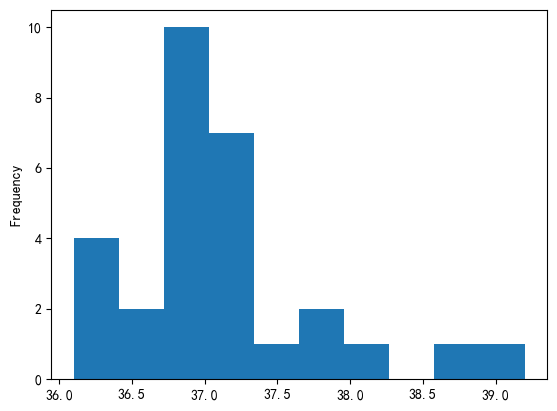

In [12]:
df1['体温'].plot(kind='hist') # pd 直方图histogram  数据量较少

<Axes: ylabel='Frequency'>

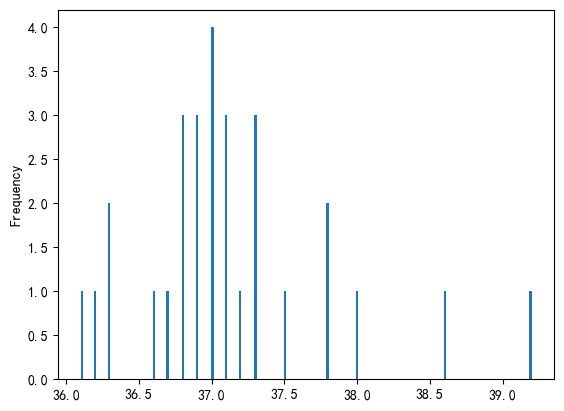

In [13]:
df1['体温'].plot(kind='hist', bins=200)

数据可视化  
1 直观地展示结论  
2 辅助数据清洗、发现隐藏关系趋势影响

【一个数据集】

"Penguins" 数据集是一个常用于数据可视化和分析练习的示例数据集，通常用于展示数据处理和探索性数据分析的技巧。该数据集包含了关于不同企鹅物种的观测数据，数据中的一些常见特征包括：

物种（species）：企鹅的物种，如 "Adelie"、"Chinstrap" 和 "Gentoo"。  
鸟喙的长度（bill_length_mm）：企鹅的喙的长度（以毫米为单位）。  
鸟喙的深度（bill_depth_mm）：企鹅的喙的深度（以毫米为单位）。  
脚蹼的长度（flipper_length_mm）：企鹅的脚蹼的长度（以毫米为单位）。  
体重（body_mass_g）：企鹅的体重（以克为单位）。  
性别（sex）：企鹅的性别。

In [14]:
sns.utils.get_data_home() # 本地数据集的地址

'C:\\Users\\huangyingzhu\\AppData\\Local\\seaborn\\seaborn\\Cache'

In [15]:
df1 = sns.load_dataset("penguins")
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [16]:
df1 = sns.load_dataset("penguins").query('species == "Adelie"') # 筛选符合条件的
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [17]:
s1 = df1['bill_length_mm']
s1

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
147    36.6
148    36.0
149    37.8
150    36.0
151    41.5
Name: bill_length_mm, Length: 152, dtype: float64

## 一个变量的各种图表

### 直方图histogram：数据的分布个数(条柱)

<Axes: xlabel='bill_length_mm', ylabel='Count'>

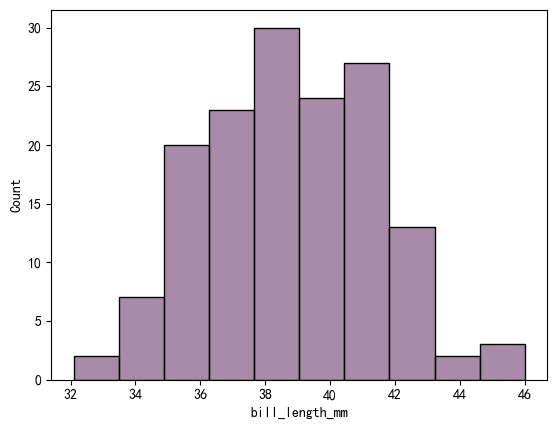

In [18]:
sns.histplot(s1, color='#8B658B')
# plt.show() # 编辑器需运行  seaborn和mpl一体

### 密度图kernel_density：数据的概率分布(平滑曲线)

<Axes: xlabel='bill_length_mm', ylabel='Density'>

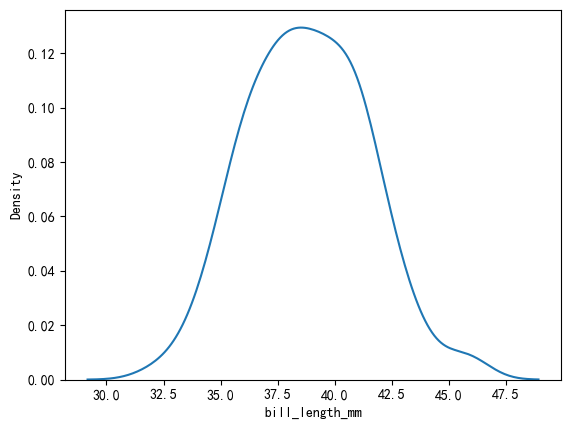

In [19]:
sns.kdeplot(s1)

### 箱型图box_plot：数据的四分位数(发现异常值)

<Axes: >

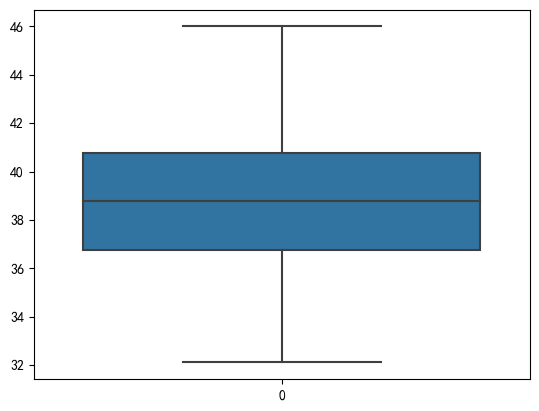

In [20]:
sns.boxplot(s1)

### 小提琴图violin_plot：密度图+箱型图

<Axes: >

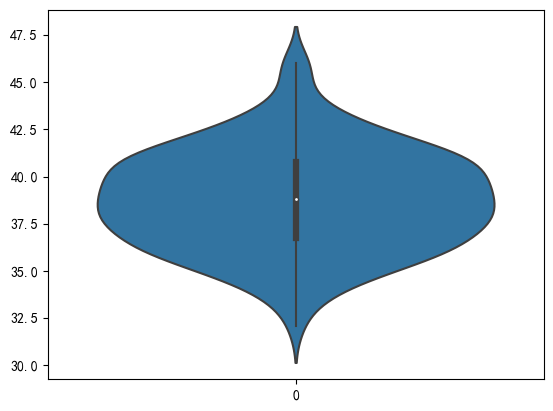

In [21]:
sns.violinplot(s1)

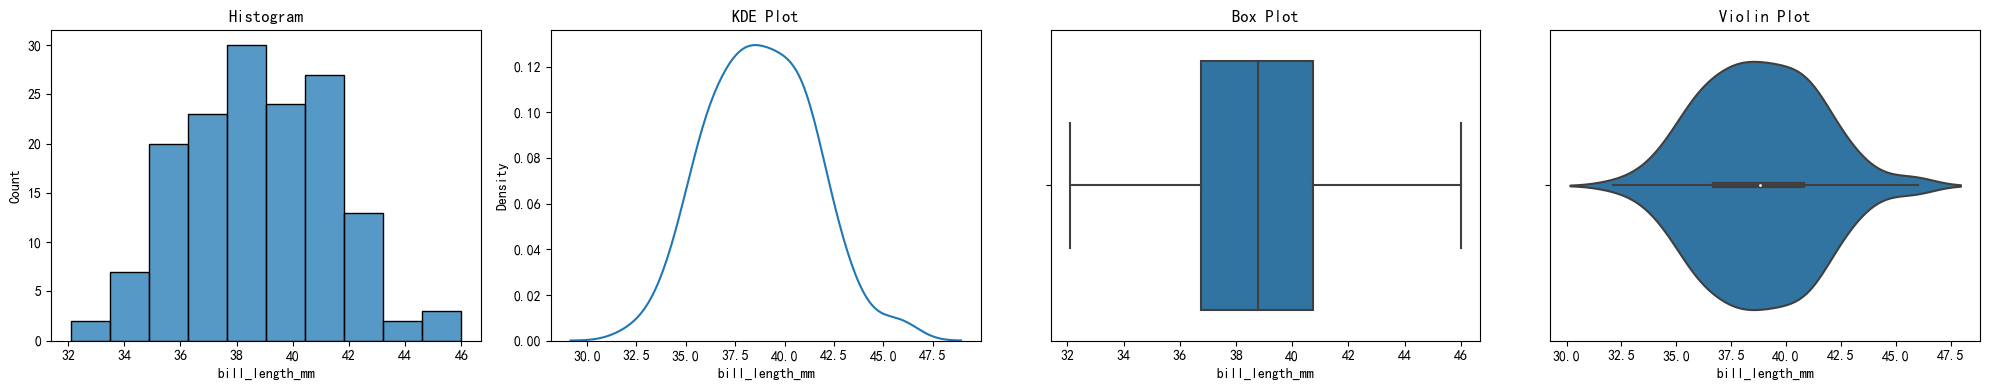

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4)) # 创建一个包含 1 行 4 列的子图

sns.histplot(df1, x='bill_length_mm', ax=axes[0]) # 传df1 指定x参数
axes[0].set_title('Histogram')

sns.kdeplot(df1, x='bill_length_mm', ax=axes[1])
axes[1].set_title('KDE Plot')

sns.boxplot(df1, x='bill_length_mm', ax=axes[2])
axes[2].set_title('Box Plot')

sns.violinplot(df1, x='bill_length_mm', ax=axes[3])
axes[3].set_title('Violin Plot')

plt.tight_layout()  # 调整子图之间的间距
# plt.show()  # 显示图形

## 给图标设置信息

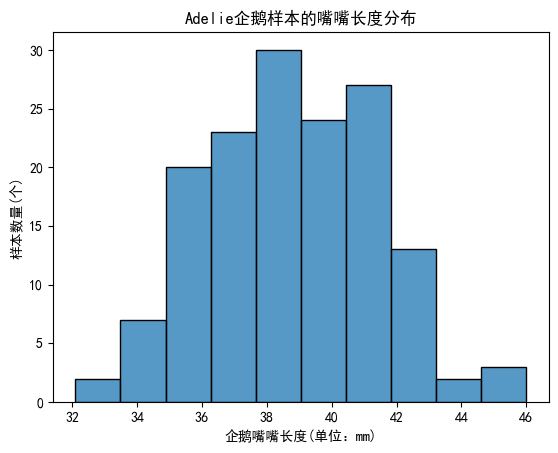

In [23]:
sns.histplot(df1, x='bill_length_mm')

plt.title('Adelie企鹅样本的嘴嘴长度分布') # 标题
plt.xlabel('企鹅嘴嘴长度(单位：mm)') # x轴标签
plt.ylabel('样本数量(个)') # y轴标签

plt.savefig('Adelie企鹅样本的嘴嘴长度分布.png', dpi=300) # 保存图片到本地 dpi分辨率
# plt.show()

## 两个数值变量的图表

### 散点图scatter_plot：变量间的相关性(是否相关 正反比 非线性)

【一个数据集】  

这个数据集包含了有关餐厅顾客付小费的信息，通常用于数据可视化和统计分析的示例。  

具体来说，"tips"数据集包含以下列：  
total_bill: 顾客的账单总额。  
tip: 顾客给出的小费金额。  
sex: 顾客的性别（男性或女性）。  
smoker: 顾客是否吸烟（"Yes"表示吸烟，"No"表示不吸烟）。  
day: 就餐的日期（星期几）。  
time: 就餐的时间（"Lunch"表示午餐，"Dinner"表示晚餐）。  
size: 就餐的人数。  

In [24]:
df1 = sns.load_dataset("tips") # 导入示例数据
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

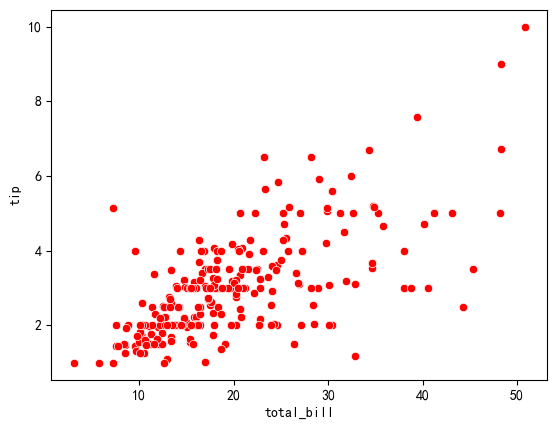

In [25]:
sns.scatterplot(df1, x='total_bill', y='tip', color='red') # 传参df1
# plt.show() # jupyter可省略

<Axes: xlabel='total_bill', ylabel='tip'>

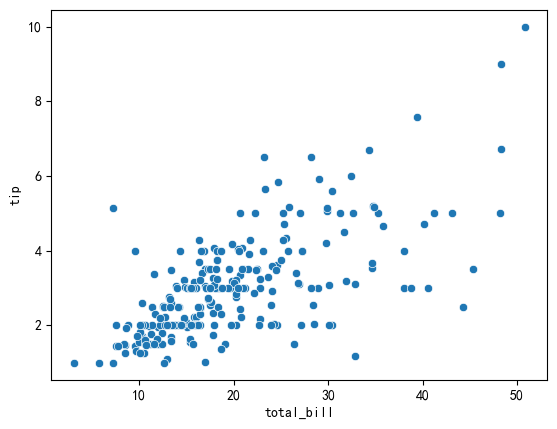

In [26]:
sns.scatterplot(x=df1['total_bill'], y=df1['tip']) # 传参 两个serices

### 折线图line_plot：时间跨度的趋势变化

【一个数据集】  

Seaborn的"flights"数据集是一个示例数据集，用于演示时间序列数据的可视化和分析。

"flights"数据集实际上包含三个列：  
year：表示年份的列，记录了不同年份的数据。  
month：表示月份的列，记录了每个观测的月份。  
passengers：表示乘客数量的列，记录了每个月的乘客人数。  

In [27]:
df2 = sns.load_dataset('flights')
df2

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [28]:
df2 = sns.load_dataset('flights').query('month == "Jan"')
df2

,year,month,passengers
0,1949,Jan,112
12,1950,Jan,115
24,1951,Jan,145
36,1952,Jan,171
48,1953,Jan,196
60,1954,Jan,204
72,1955,Jan,242
84,1956,Jan,284
96,1957,Jan,315
108,1958,Jan,340


<Axes: xlabel='year', ylabel='passengers'>

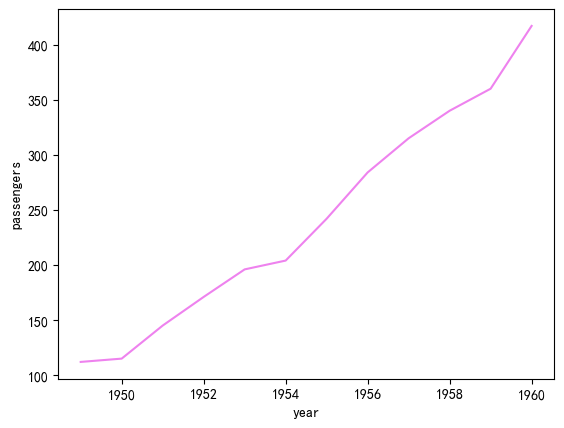

In [29]:
sns.lineplot(data=df2, x='year', y='passengers', color='violet')

## 一分类一数值变量的图表

### 条形图bar_plot：一个分类变量对应的数值变量

In [30]:
df3 = sns.load_dataset('penguins')
df3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='species', ylabel='body_mass_g'>

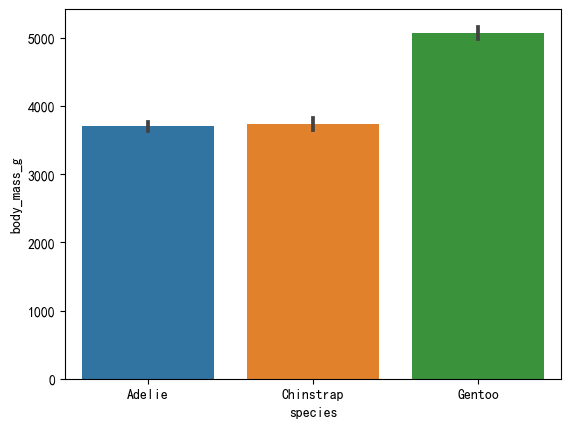

In [31]:
sns.barplot(data=df3, x='species', y='body_mass_g') # 聚合默认求平均

<Axes: xlabel='species', ylabel='body_mass_g'>

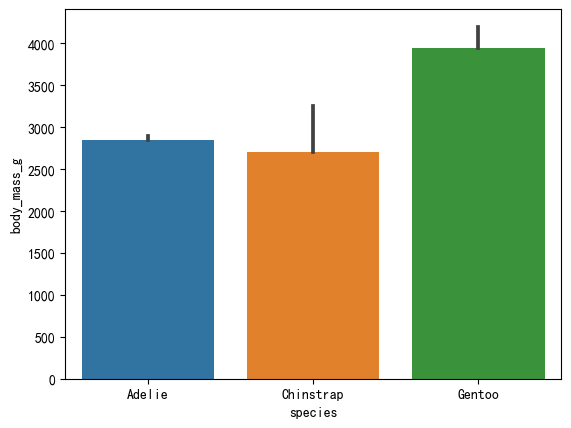

In [32]:
sns.barplot(data=df3, x='species', y='body_mass_g', estimator=np.min) # 其他聚合操作 求最小值

### (拓展)单个变量的计数图count_plot：数个数

<Axes: xlabel='species', ylabel='count'>

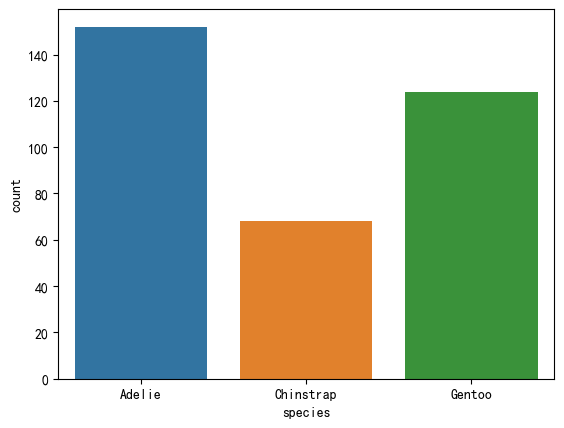

In [33]:
sns.countplot(data=df3, x='species')

### 饼图pie_plot：占比

In [34]:
# 设置示例数据
df4 = pd.DataFrame({'fruit': ['apple', 'orange', 'banana', 'pear'],
                     'vote': [32, 22, 19, 7]})
df4

,fruit,vote
0,apple,32
1,orange,22
2,banana,19
3,pear,7


seaborn无对应方法，找他爸matplotlib

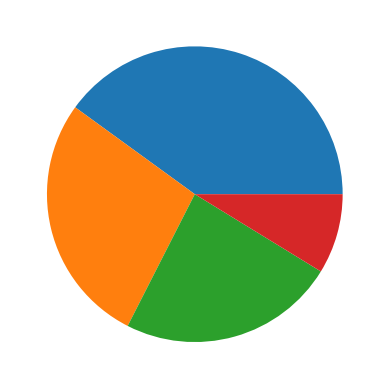

In [35]:
plt.pie(df4['vote'])
plt.show()

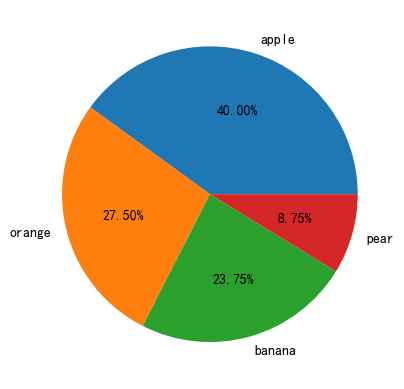

In [36]:
plt.pie(df4['vote'], labels=df4['fruit'], autopct='%.2f%%') # 标签  数字
plt.show()

### 美化图表

给点线条柱换颜色  

1 一个颜色：可选参数color固定改颜色(字符串 十六进制数)&emsp;<font color='#87CEFA'>hue色调</font>  
2 多个颜色：色盘sns.set_palette&emsp;<font color='#87CEFA'>条形图 饼图</font>

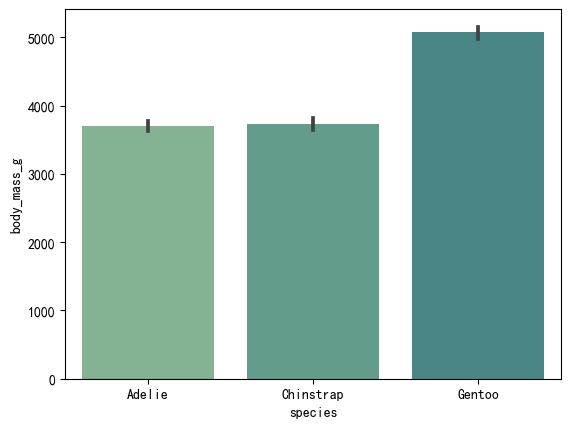

In [37]:
sns.set_palette('crest') # 山色 青绿色
sns.barplot(data=df3, x='species', y='body_mass_g')
plt.show()

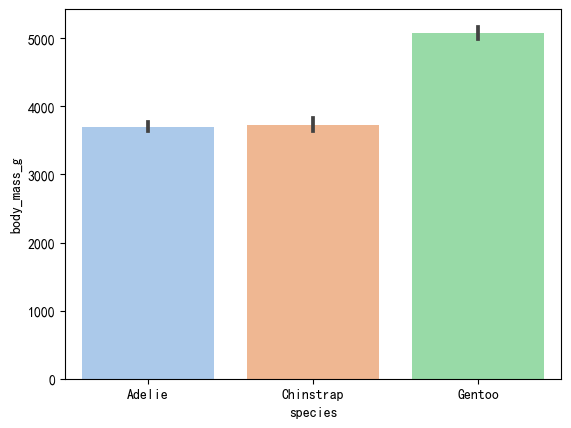

In [38]:
sns.set_palette('pastel') # 彩色粉笔色 小清晰
sns.barplot(data=df3, x='species', y='body_mass_g')
plt.show()

## 多个变量

1 增加轴：三维  
2 (分类变量)上颜色  <font color='#00BFFF'>复式条形图</font>  <font color='#00BFFF'>热力图(x分类y分类变量)</font>  
3 (数值变量)变大小  <font color='#00BFFF'>气泡图</font>  
4 多图叠合、并排

### 给散点图升级(色hue 大小size)

In [39]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


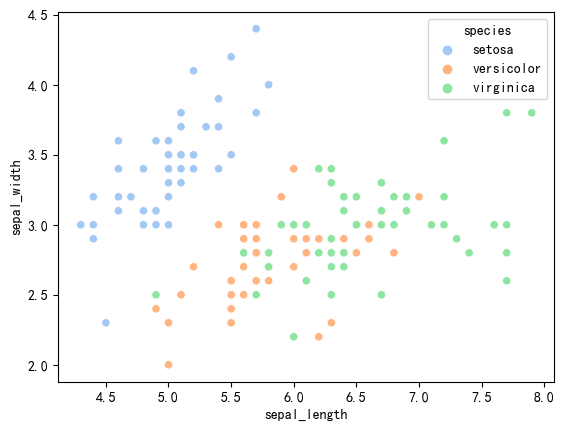

In [40]:
# 探索不同种类的鸢尾花 萼片长度和宽度的关系 → x长度 y宽度  色 species
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species') # 色调hue 指定为分类变量
plt.show()

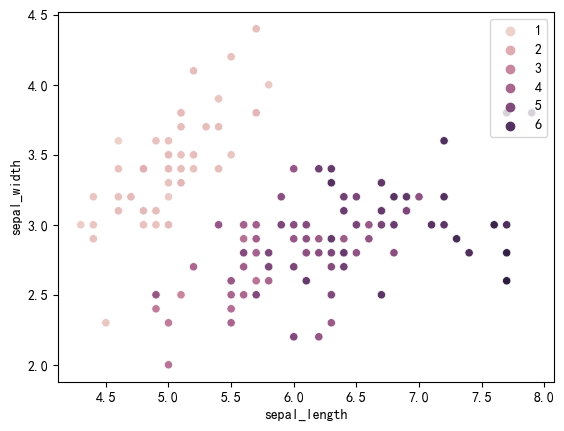

In [41]:
# 展现三个数值变量：sepal_length、sepal_width、petal_length
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='petal_length') # 引入数值变量
plt.legend(loc='upper right')
plt.show()

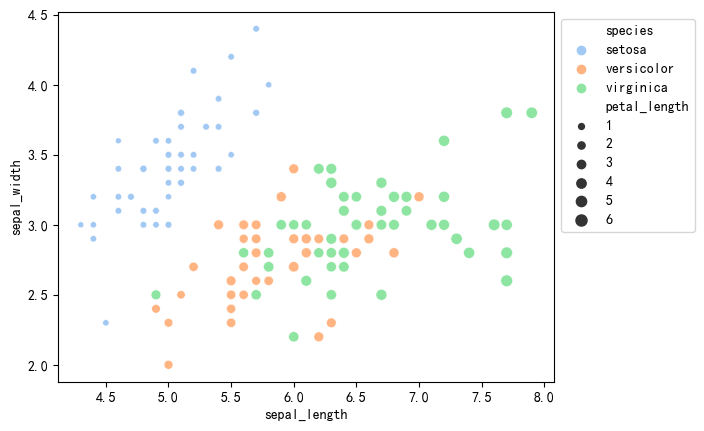

In [42]:
# 三个数值变量 + 一个分类变量
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species', size='petal_length') # 色hue/种类  大小size/长度
plt.legend(bbox_to_anchor=(1,1)) # 更改图例legend位置  元组 横向位置 纵向位置
plt.show()

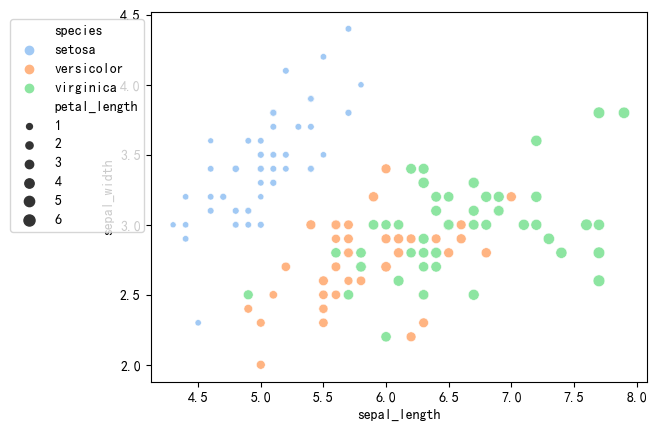

In [43]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species', size='petal_length') # 色hue/种类  大小size/长度
plt.legend(bbox_to_anchor=(0,1)) # 第一个数字 0表示在图表左边 1表示在图表右边
plt.show()

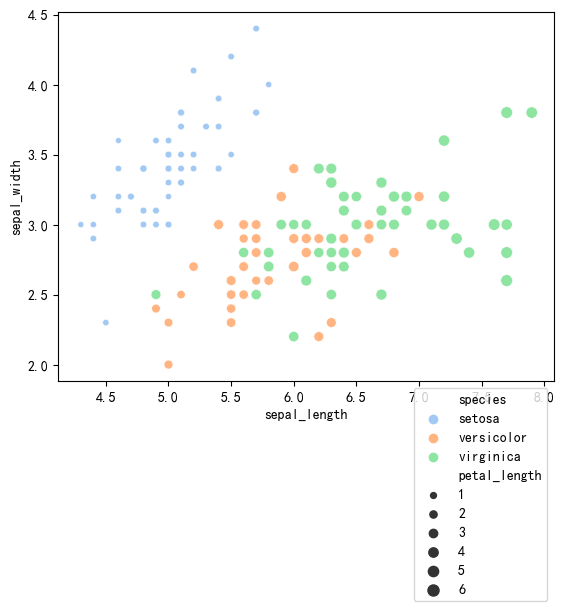

In [44]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species', size='petal_length') # 色hue/种类  大小size/长度
plt.legend(bbox_to_anchor=(1,0)) # 第二个数字 0表示在图例顶部和接近图表下边框的位置对齐 1表示和接近图表上边框的位置对齐
plt.show()

### 给折线图升级(色hue)

In [45]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


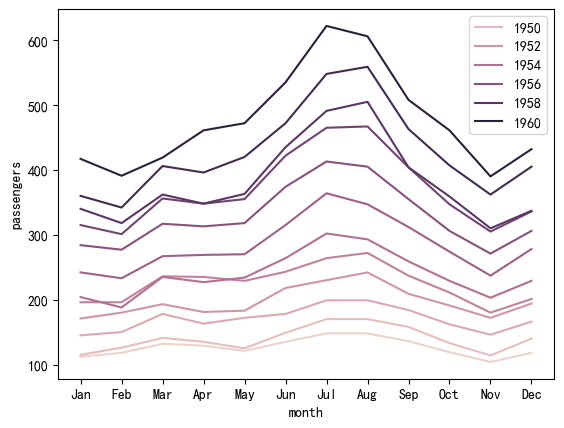

In [46]:
sns.lineplot(data=flights, x='month', y='passengers', hue='year')
plt.legend(bbox_to_anchor=(1,1)) # 图例位置
plt.show()

### 给条形图升级(更多条柱-色hue)&emsp;<font color='#87CEFA'>复式条形图</font>

In [47]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


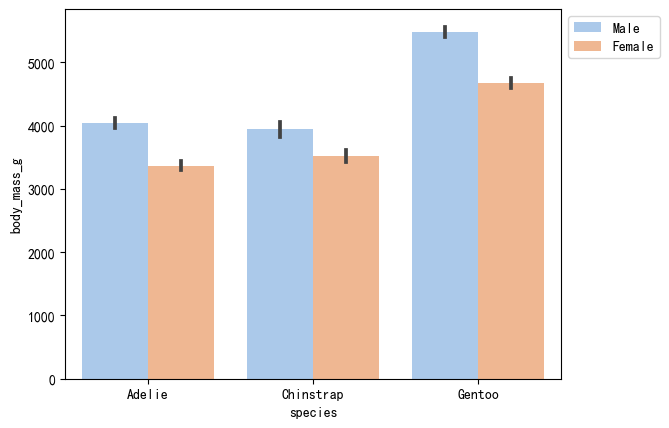

In [48]:
# 原本的条柱按照子类别划分成更多条柱  展示不同种类(之下不同性别)企鹅类别的平均体重
sns.barplot(data=penguins, x='species', y='body_mass_g', hue='sex')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### 热力图heat_map：xy表分类变量、颜色表值

In [49]:
glue = sns.load_dataset("glue").pivot(index='Model', columns='Task', values='Score')
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


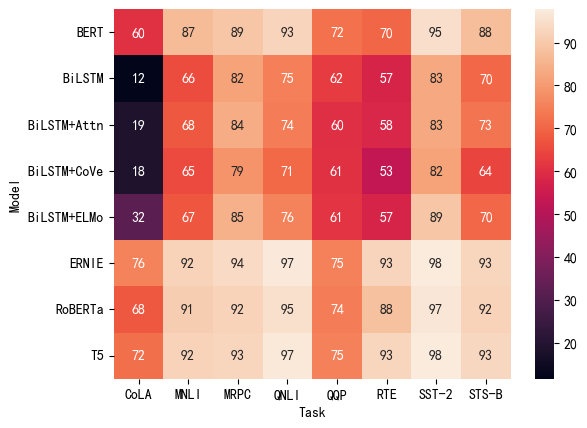

In [50]:
sns.heatmap(glue, annot=True) # 在格子上标数 annotation
plt.show()

### 把不同的直方图叠合并排

In [51]:
setosa = iris.query('species == "setosa"')
versicolor = iris.query('species == "versicolor"')
virginica = iris.query('species == "virginica"')

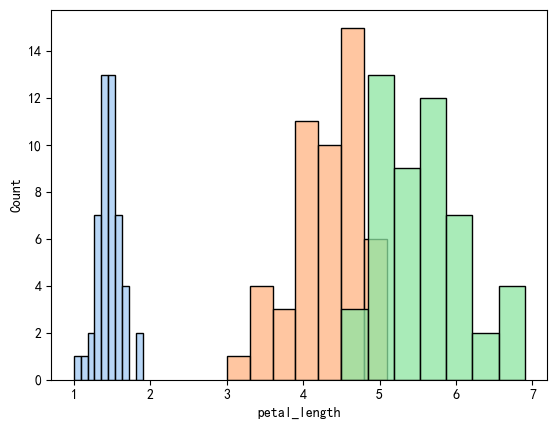

In [52]:
# 调用多次histplot
sns.histplot(setosa['petal_length'])
sns.histplot(versicolor['petal_length'])
sns.histplot(virginica['petal_length'])
plt.show()
# 条柱的粗细不统一
# 不同种类的鸢尾花，其花瓣长度有显著性差异

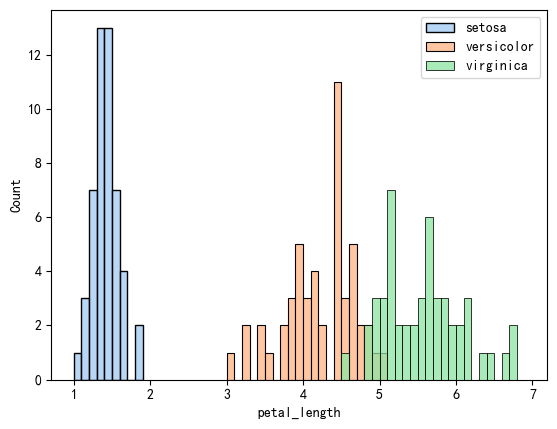

In [53]:
# 调用多次histplot  指定粗细binwidth一个条柱有多宽  label加标签/为了图例
sns.histplot(setosa['petal_length'], binwidth=0.1, label='setosa')
sns.histplot(versicolor['petal_length'], binwidth=0.1, label='versicolor')
sns.histplot(virginica['petal_length'], binwidth=0.1, label='virginica')
plt.legend() # label后展现图例
plt.show()

### 把不同的密度图叠合并排

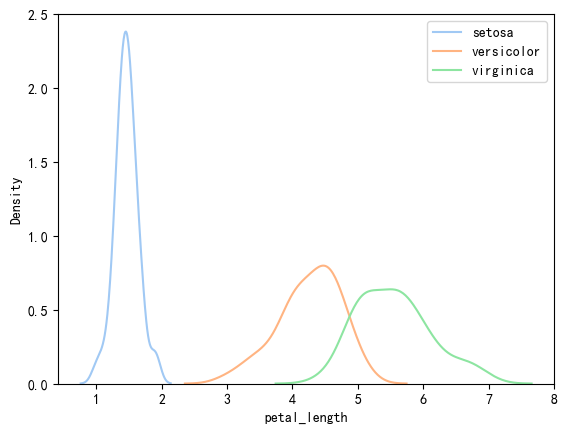

In [54]:
# 调用多次kdeplot
sns.kdeplot(setosa['petal_length'], label='setosa')
sns.kdeplot(versicolor['petal_length'], label='versicolor')
sns.kdeplot(virginica['petal_length'], label='virginica')
plt.legend() # label后展现图例
plt.show()

### 把不同的箱型图叠合并排

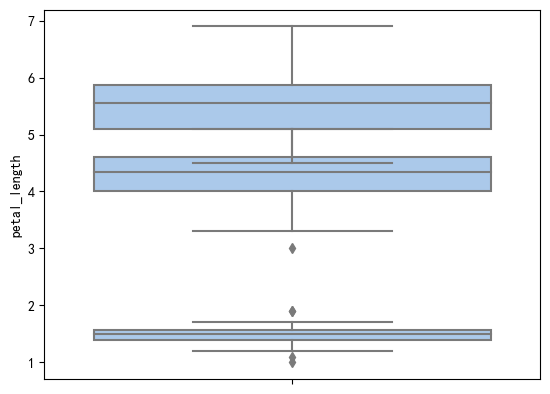

In [55]:
# 调用多次boxplot  (横轴并不表数值)
sns.boxplot(setosa, y='petal_length')
sns.boxplot(versicolor, y='petal_length')
sns.boxplot(virginica, y='petal_length')
plt.show()

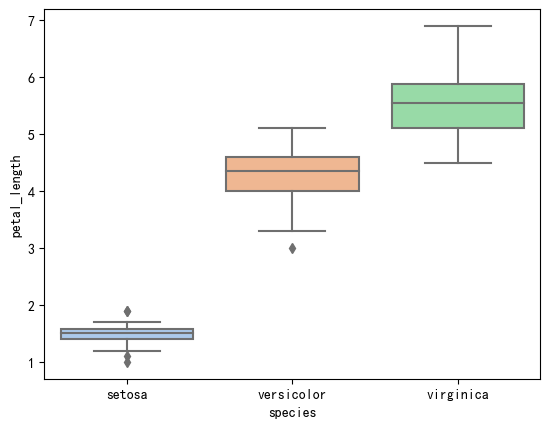

In [56]:
# 把种类作为x轴变量
sns.boxplot(iris, y='petal_length', x='species')
plt.show()

### 把不同的小提琴图叠合并排

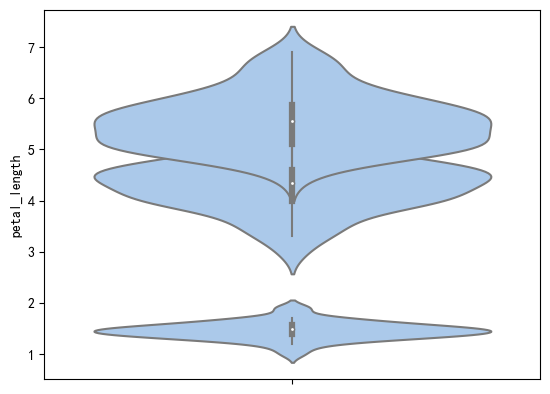

In [57]:
# 调用多次violinplot  (横轴并不表数值)
sns.violinplot(setosa, y='petal_length')
sns.violinplot(versicolor, y='petal_length')
sns.violinplot(virginica, y='petal_length')
plt.show()

### 绘制多个子图

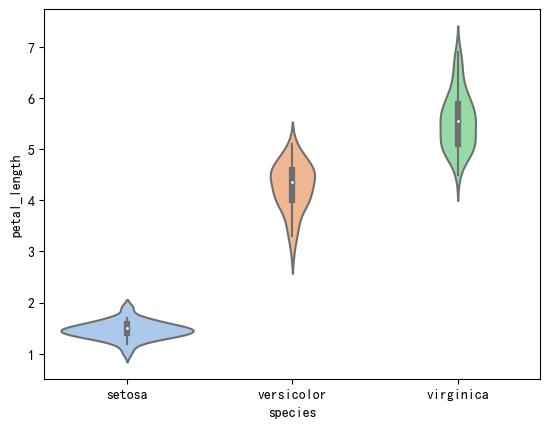

In [58]:
# 把种类作为x轴变量
sns.violinplot(iris, y='petal_length', x='species')
plt.show()

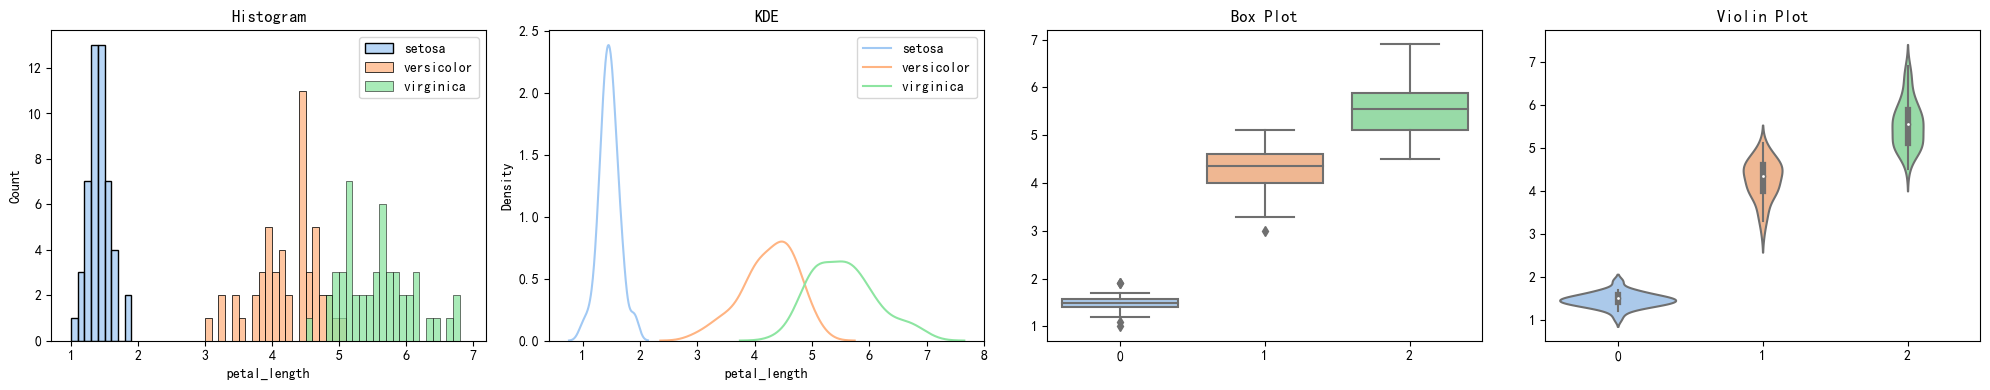

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4)) # 创建一个一行四列的图形布局  fig大图  axes子图

sns.histplot(setosa['petal_length'], binwidth=0.1, label='setosa', ax=axes[0])
sns.histplot(versicolor['petal_length'], binwidth=0.1, label='versicolor', ax=axes[0])
sns.histplot(virginica['petal_length'], binwidth=0.1, label='virginica', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].legend()

sns.kdeplot(setosa['petal_length'], label='setosa', ax=axes[1])
sns.kdeplot(versicolor['petal_length'], label='versicolor', ax=axes[1])
sns.kdeplot(virginica['petal_length'], label='virginica', ax=axes[1])
axes[1].set_title('KDE')
axes[1].legend()

sns.boxplot(data=[setosa['petal_length'], versicolor['petal_length'], virginica['petal_length']], ax=axes[2])
axes[2].set_title('Box Plot')

sns.violinplot(data=[setosa['petal_length'], versicolor['petal_length'], virginica['petal_length']], ax=axes[3])
axes[3].set_title('Violin Plot')


plt.tight_layout() # 调整子图之间的间距
plt.show() # 显示图形

### 配对图pair_plot：绘制数值变量间的两两关系

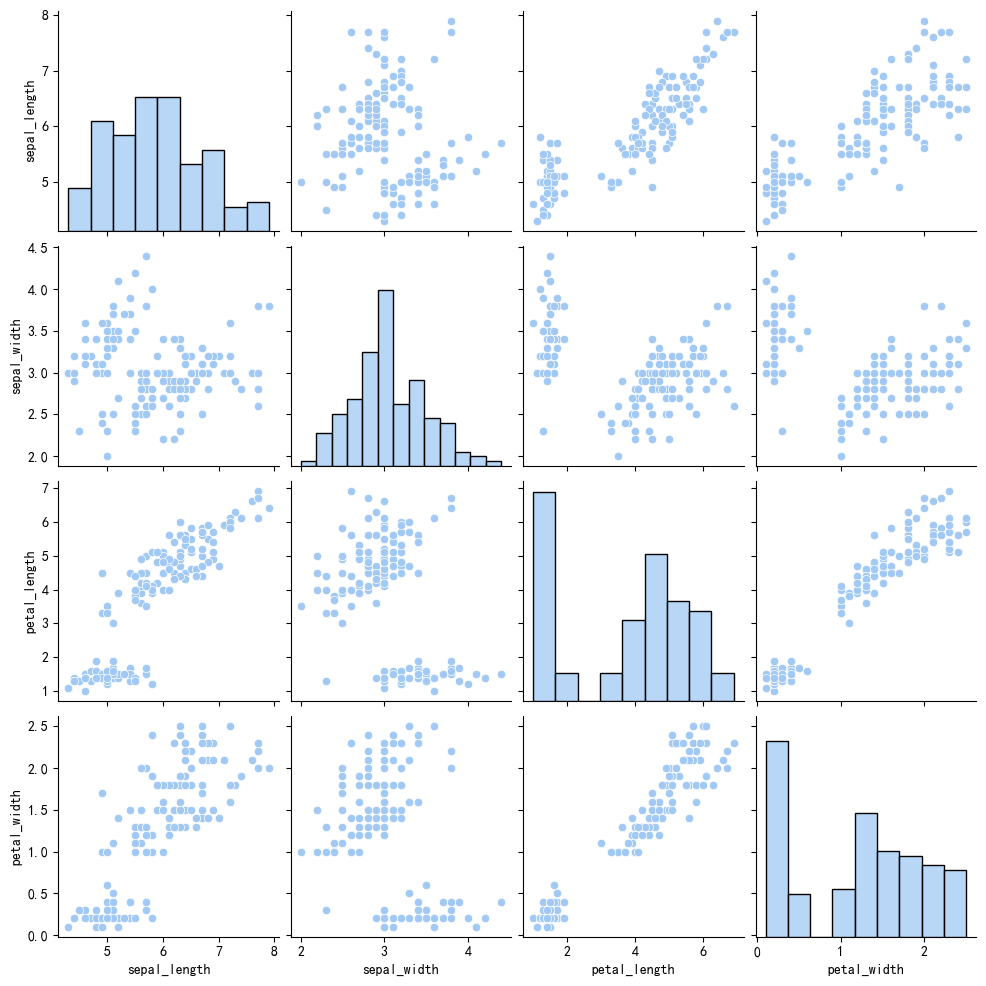

In [60]:
sns.pairplot(iris) 
plt.show() # n*n  数值变量个数
# 各变量的分布用直方图绘制
# 不同变量两两之间 散点图

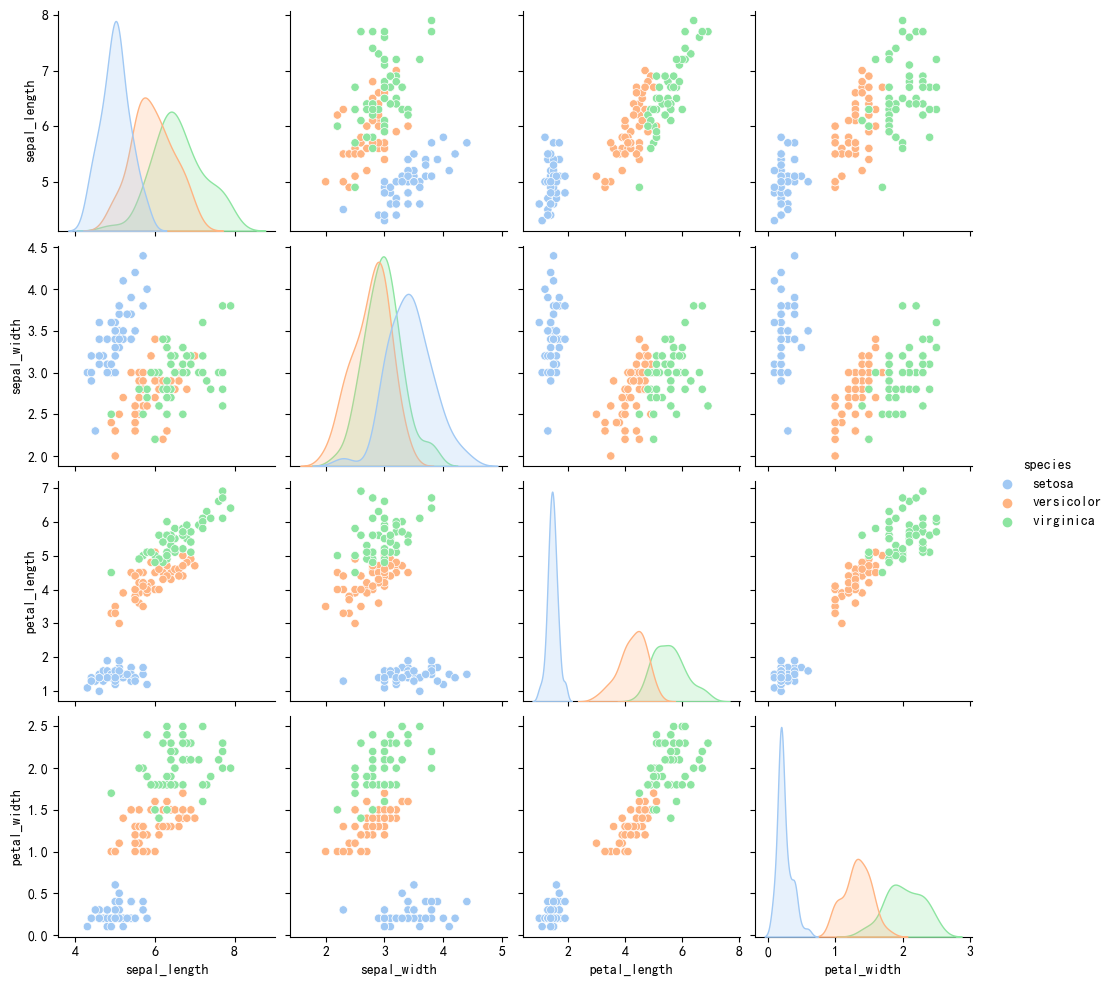

In [61]:
sns.pairplot(iris, hue='species')  # hue 赋值为某变量列名
plt.show() 
# 对比不同分类变量的数值关系